Провести навчання нейромережі для розпізнавання речей на базі набору
fashion_mnist.

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Нормалізація зображень (від 0 до 1)
train_images = train_images / 255.0
test_images = test_images / 255.0

# Перевіримо розмірність
print(f"Train images shape: {train_images.shape}")
print(f"Test images shape: {test_images.shape}")



Train images shape: (60000, 28, 28)
Test images shape: (10000, 28, 28)


In [4]:
# Побудова моделі
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),       # перетворюємо 2D-зображення у вектор
    layers.Dense(128, activation='relu'),        # перший шар
    layers.Dropout(0.3),                         # Dropout для боротьби з переобученням
    layers.Dense(64, activation='relu'),         # другий шар
    layers.Dense(10, activation='softmax')       # вихідний шар (10 класів)
])

# Компілюємо модель
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Показуємо архітектуру
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# Навчаємо модель
history = model.fit(train_images, train_labels, epochs=20,
                    validation_split=0.2, batch_size=32)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7227 - loss: 0.7675 - val_accuracy: 0.8443 - val_loss: 0.4210
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8361 - loss: 0.4516 - val_accuracy: 0.8583 - val_loss: 0.3909
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8514 - loss: 0.4064 - val_accuracy: 0.8453 - val_loss: 0.3953
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8587 - loss: 0.3801 - val_accuracy: 0.8664 - val_loss: 0.3528
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8615 - loss: 0.3645 - val_accuracy: 0.8702 - val_loss: 0.3496
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8728 - loss: 0.3436 - val_accuracy: 0.8715 - val_loss: 0.3528
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8753 - loss: 0.3402 - val_accuracy: 0.8803 - val_loss: 0.3306
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8808 - loss: 0.32

In [6]:
# Оцінка на тестових даних
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc:.4f}')


313/313 - 1s - 4ms/step - accuracy: 0.8857 - loss: 0.3252

Test accuracy: 0.8857


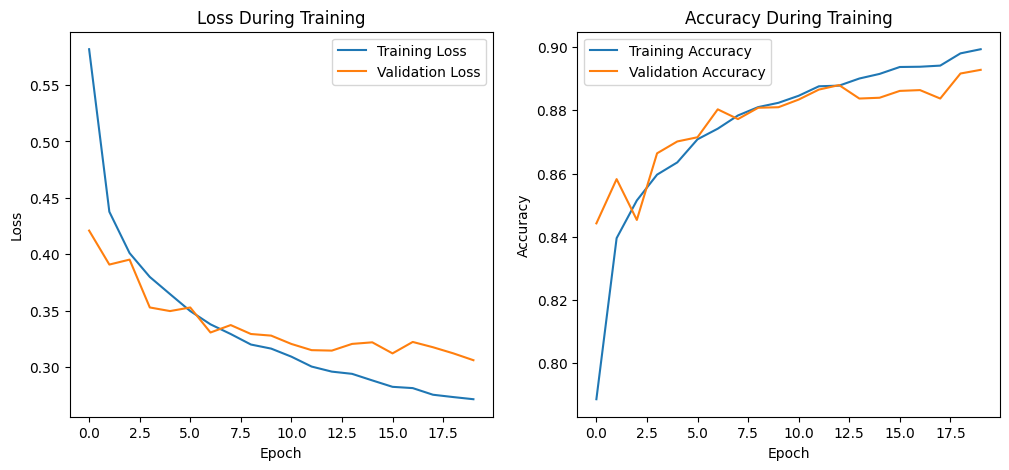

In [7]:
# Функція для побудови графіків
def plot_training_history(history):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss During Training')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy During Training')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

plot_training_history(history)

In [11]:
# Перші 5 передбачень
predictions = model.predict(test_images[:5])

for i, pred in enumerate(predictions):
    predicted_label = np.argmax(pred)
    true_label = test_labels[i]
    print(f"Predicted: {predicted_label}, True: {true_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Predicted: 9, True: 9
Predicted: 2, True: 2
Predicted: 1, True: 1
Predicted: 1, True: 1
Predicted: 6, True: 6


## Пояснення:
Flatten: перетворює зображення 28x28 у вектор довжини 784.

Dense (ReLU): нейронний шар з нелінійністю (краще вчить залежності).

Dropout: випадково "вимикає" нейрони під час навчання, щоб модель не переобучалась.

Dense (Softmax): вихідний шар для багатокласової класифікації (ймовірність на кожен клас).

## Відповіді на питання
1. Що таке Fashion MNIST?
Fashion MNIST — це набір з 70 000 зображень одягу (однаково розмірені 28x28 пікселів, у відтінках сірого).

60 000 зображень для навчання.

10 000 зображень для тестування.

10 класів (категорій одягу): футболки, штани, светри, сукні тощо.

Кожне зображення — це просте двовимірне представлення речі.

Ціль завдання: навчити модель правильно класифікувати речі на фото.

2. Що таке нейронна мережа у цьому контексті?

Це модель машинного навчання, натхненна роботою мозку, яка вчиться розпізнавати закономірності у зображеннях.

Для Fashion MNIST часто використовують:

Прості багатошарові персептрони (MLP)

Або Convolutional Neural Networks (CNN) для кращої точності.

3. Що таке accuracy і loss?

Як ми щойно розбирали:

Accuracy — частка правильних передбачень серед усіх.

Loss — число, яке показує "наскільки погано" модель передбачає результат.

Мета: зменшити loss, підвищити accuracy.

4. Чому важливо стежити за training і validation loss?

Щоб побачити, чи справді модель навчається, а не просто запам'ятовує дані (overfitting).

Якщо training loss падає, а validation loss росте ➔ переобучення.

Якщо обидва loss падають ➔ навчання правильне.

5. Як покращити якість моделі?

Основні способи:
- Регуляризація (наприклад, L2-регуляризація ваг — додає штраф за надто великі ваги).

- Dropout (вимикає випадкові нейрони під час тренування, що змушує мережу бути більш стійкою).

- Data Augmentation (збільшення обсягу даних шляхом обертання, масштабування картинок).

- Більша архітектура (більше шарів, більше нейронів).

- Learning Rate Scheduler (зменшення швидкості навчання в процесі).

- EarlyStopping (зупинка навчання, коли validation loss починає зростати).

6. Що таке Dropout і як він допомагає?
Dropout — це метод, коли під час навчання випадково "вимикають" деякі нейрони.

- Це змушує мережу не залежати від окремих нейронів.

- Зменшує ризик переобучення.

- На тестуванні всі нейрони знову активні.

7. Як виглядає типовий процес навчання на Fashion MNIST?
Типові кроки:

- Завантажити дані (fashion_mnist.load_data()).

- Нормалізувати зображення (поділити на 255, щоб отримати значення від 0 до 1).

- Побудувати нейронну мережу (Dense або CNN шари).

- Компілювати модель (compile(loss, optimizer, metrics)).

- Навчити модель (fit).

- Оцінити модель на тестових даних (evaluate).

- Побудувати графіки loss і accuracy.